<a href="https://colab.research.google.com/github/Maximonett/TT-2C2025-Data-Analitycs-Notebooks/blob/main/Clase_4/clase4_ejercicios_practicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ACTIVIDAD 1***

**Instrucciones:**

1. Descargar el siguiente conjunto de datos: [satis_clientes.csv](https://drive.google.com/file/d/169MG1sSG8IqTtLdJwIlnBOhMkF_CN_Tb/view?usp=drive_link).
2. Cargar los datos en un DataFrame en Python usando Pandas.
Utilizar el método `isnull()` para identificar las filas con datos faltantes y contar el número de valores nulos por columna.
3. Usar el método `duplicated()` para identificar las filas duplicadas y contar cuántas filas duplicadas hay en total.
4. Crear un informe que incluya:
  * La cantidad total de registros en el DataFrame.
  * La cantidad total de valores nulos por columna.
  * La cantidad de filas duplicadas.
  * Un subconjunto de los registros duplicados para que se vea el contenido.


In [5]:
import numpy as np
import pandas as pd

La función pd.isnulll() detecta valores nulos (como NaN, None, etc.) y devuelve True si el valor es nulo, o False si no lo es.

In [6]:
na=np.nan
print(type(na))

<class 'float'>


In [7]:
pd.isnull(np.nan)

True

In [9]:
pd.isnull(None)

True

La función pd.isna() en pandas se utiliza para detectar valores nulos (missing values) en objetos, como NaN, None, etc.

In [10]:
pd.isna(np.nan)

True

In [12]:
pd.isna(None)
## Tambien se puede usar con Series
pd.isna(pd.Series([1,2,np.nan,4]))

,0
0,False
1,False
2,True
3,False


Sí, **`np.nan`** (Not a Number) de la librería **NumPy** en Python es la forma estándar de representar un **valor faltante o indefinido**, y en el contexto de análisis de datos y computación científica, se le considera un **valor nulo**.

---

## **Contexto y Uso de `np.nan`**

* **Definición:** `np.nan` es un valor especial de **coma flotante** (`float`) que se utiliza para indicar que un valor no está disponible (es nulo), no es aplicable o es matemáticamente indefinido (como el resultado de dividir $0/0$ o $\infty - \infty$).
* **Valor Nulo:** Aunque técnicamente es un valor de punto flotante, en la práctica es el marcador de "nulo" o "perdido" más común y aceptado en el ecosistema de Python, especialmente en librerías como **NumPy** y **pandas**.
* **Importancia en pandas:** En la librería **pandas**, que está construida sobre NumPy, `np.nan` es el marcador principal para datos faltantes en Series y DataFrames.

---

## **Distinción Importante: `None` vs. `np.nan`**

Es importante notar la diferencia con el valor incorporado de Python **`None`**:

| Característica | `np.nan` | `None` |
| :--- | :--- | :--- |
| **Tipo de Dato** | Coma flotante (`float`) | Objeto `NoneType` |
| **Uso Principal** | Marcar datos **faltantes** o **nulos** en *arrays* numéricos (NumPy, pandas). | Ausencia de **valor** o **referencia** en Python general. |
| **Comportamiento** | Se **propaga** en operaciones matemáticas. $\text{Ej: } 5 + \text{nan} = \text{nan}$ | Genera errores (`TypeError`) en operaciones matemáticas. $\text{Ej: } 5 + \text{None}$ |
| **Chequeo de Nulidad** | `np.isnan(valor)` o `valor != valor` | `valor is None` |


O incluso con Dataframes

In [13]:
import pandas as pd
import numpy as np

pd.isnull(pd.DataFrame({
    'Column A':[1,np.nan,7],
    'Column B':[np.nan,2,3],
    'Column C':[np.nan,2,np.nan]
}))


,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


In [14]:
#montar drive al colab con comandos

from google.colab import drive
drive.mount('/content/drive')

#Para facilitar las tareas, podemos cambiar la ruta de trabajo con el método chdir() de la librería os de python.
import os
os.chdir('/content/drive/MyDrive/DATASETS')
# os.chdir('/content/drive/My Drive/{mi ruta de carpetas}')
!ls # muestra el contenido de la carpeta

import pandas as pd
df=pd.read_csv('satis_clientes.csv')
df.head()

Mounted at /content/drive
hotels.csv  netflix_titles.csv	reviews.csv  satis_clientes.csv  users.csv


,id,Empresa,Fecha,Calificación,Comentarios
0,1,Mitchell Group,11/12/2024,1.0,Integer ac leo. Pellentesque ultrices mattis o...
1,2,Kuhn-Fay,25/01/2024,4.0,Vestibulum ac est lacinia nisi venenatis trist...
2,3,Moen-Blick,11/11/2024,3.0,Aliquam quis turpis eget elit sodales sceleris...
3,4,McDermott Inc,01/12/2024,1.0,NaN
4,5,Keebler Inc,12/01/2024,4.0,Integer ac leo. Pellentesque ultrices mattis o...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1128 non-null   int64  
 1   Empresa       1128 non-null   object 
 2   Fecha         1128 non-null   object 
 3   Calificación  904 non-null    float64
 4   Comentarios   818 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 44.2+ KB


Si bien lo vamos a ver más adelante, asi podemos cambiar el tipo de dato de una columna
* [Pandas data type](https://numpy.org/doc/2.3/user/basics.types.html#)
* [Caracter data type](https://numpy.org/doc/2.3/reference/arrays.dtypes.html#arrays-dtypes-constructing)


In [16]:
df["id"]=df["id"].astype("i")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1128 non-null   int32  
 1   Empresa       1128 non-null   object 
 2   Fecha         1128 non-null   object 
 3   Calificación  904 non-null    float64
 4   Comentarios   818 non-null    object 
dtypes: float64(1), int32(1), object(3)
memory usage: 39.8+ KB


In [18]:
df.isnull()

,id,Empresa,Fecha,Calificación,Comentarios
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,False
...,...,...,...,...,...
1123,False,False,False,False,False
1124,False,False,False,True,False
1125,False,False,False,False,True
1126,False,False,False,False,False


****Lo que hicimos fue cambiar de typo Object a tipo String****


In [19]:
df["Empresa"]=df["Empresa"].astype("string")
df["Empresa"].dtype

string[python]

****Me da la cantidad de valores nan (NULOS) de cada columna****

In [20]:
df.isnull().sum()

,0
id,0
Empresa,0
Fecha,0
Calificación,224
Comentarios,310


In [21]:
# Asi listamos los valores con alguna celda nula
df[df.isnull().any(axis=1)]

,id,Empresa,Fecha,Calificación,Comentarios
3,4,McDermott Inc,01/12/2024,1.0,NaN
6,7,Moen-Hartmann,11/03/2024,NaN,NaN
7,8,Lubowitz and Sons,27/01/2024,NaN,"Donec diam neque, vestibulum eget, vulputate u..."
8,9,Waters-Lakin,04/09/2024,NaN,NaN
9,10,Legros-Olson,12/11/2024,5.0,NaN
...,...,...,...,...,...
1121,995,Altenwerth LLC,13/09/2024,NaN,NaN
1122,995,Altenwerth LLC,13/09/2024,NaN,NaN
1124,997,"Schimmel, Gleichner and O'Keefe",25/12/2024,NaN,In hac habitasse platea dictumst. Morbi vestib...
1125,998,"Strosin, Tromp and Dicki",23/05/2024,4.0,NaN


from matplotlib import pyplot as plt
_df_18['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Calificación'].plot(kind='hist', bins=20, title='Calificación')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='id', y='Calificación', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['Calificación']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('Calificación')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_23['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['Calificación'].plot(kind='line', figsize=(8, 4), title='Calificación')
plt.gca().spines[['top', 'right']].set_visible(False)

#DATOS DUPLICADOS

# Actividad 2: Exploración y limpieza preliminar con Python.
**Contexto**
En esta actividad, trabajarás guiado por Luis, nuestro Analista de BI, con una planilla de Google Sheets que registra la temperatura corporal de un grupo de personas durante 10 días. Debes realizar un examen preliminar para identificar datos problemáticos, como duplicados y valores nulos. Esta práctica te ayudará a dar los pasos previos a la limpieza de datos, un componente vital en cualquier proyecto de análisis.

**Objetivos**
* Identificar los datos duplicados y nulos en el conjunto.
* Analizar el mejor tratamiento para los datos anómalos y nulos.

**Ejercicio práctico**
1. Crear un dataframe a partir de la planilla de cálculo y efectuar un examen preliminar.
2. Identificar los datos:

  a. duplicados

  b. nulos
3. Analizá cuál sería el mejor tratamiento para los datos anómalos (fuera de rango) y nulos en los siguientes contextos **(YA RESUELTO)**:

<center><img src="https://drive.google.com/uc?id=1CaYiA8Sc5Z1KPEA6NZ2DYWuCzaihZ6BQ"></center>

**Sets de datos**
* [Actividad 2](https://docs.google.com/spreadsheets/d/1-rUn4TUwpGrLE1DH8moeiR5eSyeF-jOOTpfhRgZxVIQ/edit?usp=sharing)

**¿Por qué importa esto en SynthData?**

La exploración y limpieza de datos son pasos esenciales para garantizar que cualquier análisis posterior sea robusto y significativo. En SynthData, nos enfrentamos a datos en diferentes formatos, y es crucial asegurarnos de que estén listos para ser analizados. Esta actividad te enseñará a detectar problemas comunes en conjuntos de datos, como duplicados y valores nulos, y cómo abordarlos adecuadamente.

#Crear el DATAFRAME

In [23]:
#importar la libreria
#crear el dataframe
#probar que se haya cargado el dataframe

import pandas as pd
df=pd.read_csv('https://docs.google.com/spreadsheets/d/1-rUn4TUwpGrLE1DH8moeiR5eSyeF-jOOTpfhRgZxVIQ/gviz/tq?tqx=out:csv&sheet=')
df.head()

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,Marcellus Antosik,36.85,36.01,37.36,37.85,36.31,36.55,36.71,37.79,36.44,36.86
1,Olia Thomson,36.06,36.42,36.16,36.03,36.00,36.08,37.45,37.92,37.53,36.54
2,Almeta Meredith,36.89,37.74,36.16,36.59,37.93,37.12,36.34,36.04,NaN,37.05
3,Massimiliano Waller,36.50,37.91,NaN,36.16,37.41,37.73,36.57,37.94,36.03,36.80
4,Melody Fedynski,37.90,37.69,36.55,37.06,37.81,36.77,36.89,36.35,37.36,37.08


****COMO TRAER A COLAB UN GOOGLE SHEET****

In [24]:
from google.colab import sheets
sheet=sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1nWV51hUj5IUWsFGAI--rlHzXPiY4IfJmrDupv0UnzTs/edit#gid=0


###1.2) Exploración preliminar
Los métodos de exploración son esenciales para obtener una comprensión inicial de los datos y su estructura.
Algunos de los métodos más utilizados son:
* `df.head(n)`: muestra las primeras n filas del dataframe (por defecto n = 5).
* `df.tail(n)`: muestra las últimas n filas del dataframe.
* `df.info()`: proporciona un resumen del dataframe.
* `df.describe()`: genera estadísticas que veremos más adelante.
* `df.shape`: devuelve una tupla que contiene el número de filas y columnas del dataframe.
* `df.columns`: devuelve una lista de los nombre de las columnas del dataframe.
* `df.index`: devuelve los índices del dataframe.
* `df.dtypes`: devuelve los tipos de datos de cada columna.
* `df.isnull()`: devuelve un dataframe booleano que indica si hay valores nulos en el dataframe. Tiene una función inversa: `df.notnull()`.
* `df.value_counts()`: cuenta las ocurrencias de los valores de una serie.
* `df.unique()`: devuelve los valores únicos de una columna.
* `df.sample(n)`: devuelve una muestra aleatoria de n filas

In [29]:
import pandas as pd
df=pd.read_csv('https://docs.google.com/spreadsheets/d/1-rUn4TUwpGrLE1DH8moeiR5eSyeF-jOOTpfhRgZxVIQ/gviz/tq?tqx=out:csv&sheet=')

#Muestra de los primeros 4 registros
df.head(4)

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,Marcellus Antosik,36.85,36.01,37.36,37.85,36.31,36.55,36.71,37.79,36.44,36.86
1,Olia Thomson,36.06,36.42,36.16,36.03,36.00,36.08,37.45,37.92,37.53,36.54
2,Almeta Meredith,36.89,37.74,36.16,36.59,37.93,37.12,36.34,36.04,NaN,37.05
3,Massimiliano Waller,36.50,37.91,NaN,36.16,37.41,37.73,36.57,37.94,36.03,36.80


In [30]:
#Muestra de los ultimos 6 registros

In [31]:
df.tail(6)

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
3012,Cullin MacGuffog,37.17,37.60,36.34,36.53,37.24,36.67,37.88,36.07,36.12,36.01
3013,Marc Pullinger,36.07,37.73,36.29,37.37,36.31,36.73,36.65,36.48,37.62,37.13
3014,Marnia Carillo,NaN,36.93,36.47,38.00,37.94,36.93,NaN,36.01,37.02,37.51
3015,Vic Zanotti,37.19,36.49,37.24,37.10,36.27,37.42,36.92,36.54,37.13,37.02
3016,Hoyt Koenen,37.57,37.23,36.76,36.17,36.61,37.21,37.66,37.18,36.45,36.68
3017,Artus Simmill,37.09,36.26,36.25,36.27,36.72,37.28,37.19,37.13,37.89,36.42


In [32]:
#Muestra un resumen de informacion del DataFrame

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  3018 non-null   object 
 1   d1      2832 non-null   float64
 2   d2      2871 non-null   float64
 3   d3      2822 non-null   float64
 4   d4      2839 non-null   float64
 5   d5      2855 non-null   float64
 6   d6      2820 non-null   float64
 7   d7      2864 non-null   float64
 8   d8      2834 non-null   float64
 9   d9      2816 non-null   float64
 10  d10     2845 non-null   float64
dtypes: float64(10), object(1)
memory usage: 259.5+ KB


In [34]:
print(pd.Series([1,np.nan,7]).dtype)

float64


In [35]:
#Muestra el resumen estadistico de las columnas. Conteo, promedio,minimo , maximo

In [36]:
df.describe()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
count,2832.000000,2871.000000,2822.000000,2839.000000,2855.000000,2820.000000,2864.000000,2834.000000,2816.000000,2845.000000
mean,37.016910,36.989749,37.003487,37.001899,37.013440,37.000397,37.014745,37.003814,37.012035,36.997701
std,0.580133,0.581439,0.574085,0.576158,0.581639,0.582132,0.576455,0.568113,0.578429,0.578191
min,36.000000,36.000000,36.000000,36.010000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
25%,36.510000,36.480000,36.502500,36.500000,36.520000,36.490000,36.520000,36.520000,36.510000,36.500000
50%,37.025000,36.970000,37.020000,37.020000,37.030000,37.000000,37.025000,37.010000,37.020000,37.000000
75%,37.530000,37.490000,37.510000,37.490000,37.510000,37.500000,37.520000,37.490000,37.520000,37.500000
max,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000


#ATRIBUTOS SE USAN SIN PARENTESIS

In [45]:


#cantidad de registro y columnas
df.shape


(3018, 11)

In [46]:
#Nombres de las colunas
df.columns

Index(['nombre', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10'], dtype='object')

In [48]:
#Rango de los indices
df.index

RangeIndex(start=0, stop=3018, step=1)

In [50]:
#Tipo de dato que hay en cada columno
df.dtypes

,0
nombre,object
d1,float64
d2,float64
d3,float64
d4,float64
d5,float64
d6,float64
d7,float64
d8,float64
d9,float64



#Estos ya no son atrubutos sino metodos

In [52]:
#Un datafreme que muestra true donde faltan datos
df.isnull()

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3013,False,False,False,False,False,False,False,False,False,False,False
3014,False,True,False,False,False,False,False,True,False,False,False
3015,False,False,False,False,False,False,False,False,False,False,False
3016,False,False,False,False,False,False,False,False,False,False,False


In [54]:
#Muesta cuantas veces se repite un valor en una columna (DUPLICADOS)
df['d2'].value_counts()

,count
d2,
36.81,26
36.36,25
36.23,25
37.98,24
36.78,22
...,...
37.75,7
36.88,7
36.46,7


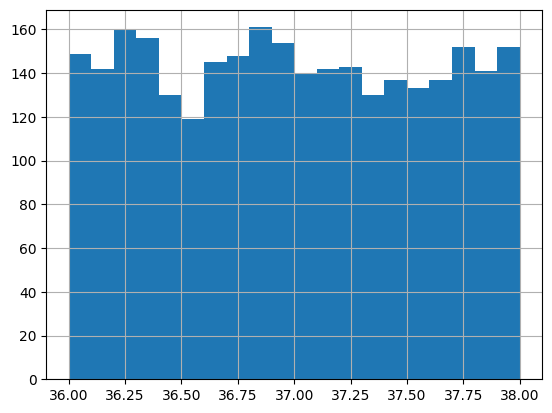

In [56]:
import matplotlib.pyplot as plt
df['d2'].hist(bins=20)
plt.show()

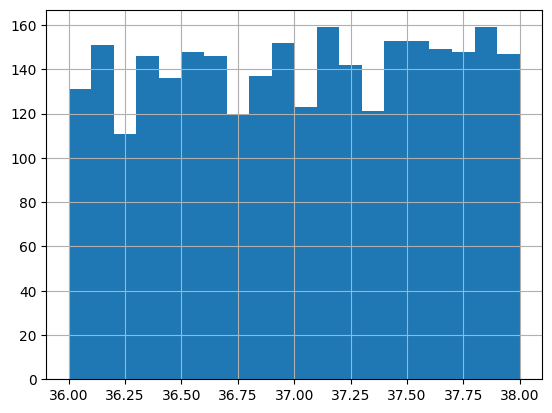

In [58]:
#Muestra los valores de una columna, sin repetidos
df['d1'].unique()

import matplotlib.pyplot as plt
df['d1'].hist(bins=20)
plt.show()

In [60]:
#Muestra los valores de una columna, sin repetir
df['d1'].unique()

array([36.85, 36.06, 36.89, 36.5 , 37.9 , 36.47, 36.27, 37.59, 36.72,
       36.32, 36.79, 36.02, 37.23, 36.24, 36.73, 36.93, 37.76, 36.16,
       37.81, 37.31, 36.25, 36.23, 36.04, 36.97, 37.52, 36.77,   nan,
       37.48, 36.36, 36.12, 37.2 , 36.81, 37.43, 37.02, 36.52, 37.98,
       37.46, 36.55, 37.45, 36.07, 37.05, 36.91, 36.41, 36.05, 36.96,
       36.  , 36.11, 37.75, 37.87, 37.88, 37.63, 37.15, 36.49, 36.3 ,
       37.97, 38.  , 37.64, 37.41, 36.53, 36.68, 37.58, 37.55, 37.77,
       37.83, 36.33, 36.82, 36.98, 37.69, 36.29, 36.67, 37.65, 37.16,
       36.95, 37.71, 37.68, 37.86, 36.87, 36.48, 37.91, 36.61, 37.32,
       37.5 , 36.39, 37.18, 36.4 , 37.82, 36.03, 37.33, 37.84, 37.17,
       36.21, 37.51, 37.57, 37.78, 36.08, 37.99, 37.09, 36.84, 37.53,
       36.56, 37.44, 36.09, 37.34, 36.15, 36.64, 36.17, 36.63, 37.73,
       36.92, 36.1 , 37.1 , 37.24, 36.51, 36.76, 36.86, 36.75, 36.65,
       37.7 , 37.29, 36.8 , 37.42, 36.38, 37.94, 36.46, 37.39, 36.71,
       37.11, 37.25,

In [62]:
#Muestra aleatoria de 10 registros
df.sample(10)

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
2537,Aeriell Yakovich,37.96,37.82,37.17,37.66,37.97,NaN,36.15,37.43,36.16,36.68
2691,Robbin Brewin,36.17,37.65,37.19,NaN,37.57,36.21,NaN,36.04,36.83,36.99
2572,Zaccaria Asbrey,NaN,37.33,36.21,NaN,37.93,37.08,37.96,36.13,37.54,36.70
2618,Bren Maplethorp,NaN,36.05,36.51,37.53,36.52,36.09,37.12,37.54,36.45,36.44
1117,Lloyd Giercke,37.48,36.31,37.72,37.00,36.86,37.59,36.38,36.91,NaN,36.90
638,Briana Woodward,36.99,37.96,36.70,NaN,36.61,36.32,37.49,37.12,36.45,36.38
2614,Deeann Purdon,37.57,37.99,37.63,36.97,37.31,36.37,36.21,NaN,36.39,37.67
1776,Marianne Lorenzetto,36.86,36.35,37.13,36.22,37.91,37.73,37.59,NaN,37.41,37.82
451,Tandi Dearl,36.58,36.27,36.30,37.58,37.48,37.28,37.79,37.14,37.27,36.47
2776,Bail Zupa,37.16,36.98,36.72,36.30,37.98,37.80,37.17,NaN,37.06,37.28


❓ ¿Podrías decir si hay valores nulos en este dataframe?

✨ En un primer análisis, ya podemos decir que hay valores nulos:
tanto `shape` como `index` indican que hay 3018 registros, pero `info()` nos da la pauta de que la única columna que no tiene valores nulos es la de nombres.


#### Duplicados
Para trabajar con datos duplicados, el método principal es `duplicated()` que devuelve un valor booleano por cada fila, indicando si es duplicado o no. Devuelve `True`, si una fila es duplicado de alguna anterior.
* Con el parámetro `subset`, permite buscar duplicados en columnas específicas.
* Combinada con otras funciones, podemos obtener más resultados, por ejemplo, `df.duplicated().sum()` cuenta  la cantidad de filas duplicadas

In [63]:
# Saber cuáles filas son duplicadas
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3013,False
3014,False
3015,False
3016,True


In [64]:
# Contar la cantidad de filas duplicadas
print(df.duplicated().sum())

18


In [66]:
# Para un paciente dado, visualizar esas filas duplicadas
df[df["nombre"] == "Dagny Burree"]

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
73,Dagny Burree,37.58,36.17,37.0,37.84,37.29,37.54,36.07,36.75,NaN,36.53
136,Dagny Burree,37.58,36.17,37.0,37.84,37.29,37.54,36.07,36.75,NaN,36.53


***Como poder visulizar los registros duplicados?***
`df.duplicated(keep=???)`
* keep='first' (default) → solo las repeticiones después de la primera son True.
* keep='last' → solo las repeticiones antes de la última son True.
* keep=False → todas las ocurrencias de un duplicado son True.

In [69]:
#De esta manera
df[df.duplicated(keep='first')]

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
136,Dagny Burree,37.58,36.17,37.00,37.84,37.29,37.54,36.07,36.75,NaN,36.53
235,Merola Muscat,36.24,37.19,37.16,37.66,36.88,37.80,36.04,37.47,38.00,36.92
847,Bernarr D'Arrigo,36.83,36.94,NaN,36.01,37.80,37.94,36.30,37.97,37.75,37.35
1413,Pascal Merfin,37.14,36.31,37.61,37.12,37.28,36.43,37.39,36.69,37.83,37.17
1414,Marijn Lothean,37.89,37.06,37.05,37.05,37.32,37.78,36.97,37.84,37.62,37.78
1451,Gerladina Maguire,36.60,36.69,37.69,37.17,36.57,37.29,36.01,36.52,37.73,36.26
1528,Andriana Mossman,37.40,36.81,37.46,36.89,36.22,36.40,37.97,36.07,37.86,NaN
1687,Ginger Iacoviello,36.06,37.71,36.05,36.88,NaN,36.37,37.15,36.90,37.03,37.61
2200,Ailyn Hexter,36.67,36.10,36.36,36.59,36.99,37.22,36.34,37.51,36.72,37.59
2261,Winne Margiotta,37.84,37.40,37.23,37.90,NaN,NaN,37.01,37.03,36.84,37.53


In [71]:
df[df.duplicated(keep=False)]

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
13,Merola Muscat,36.24,37.19,37.16,37.66,36.88,37.80,36.04,37.47,38.00,36.92
42,Holden Kerry,36.07,37.11,36.58,NaN,36.41,36.63,36.60,36.70,36.51,37.53
73,Dagny Burree,37.58,36.17,37.00,37.84,37.29,37.54,36.07,36.75,NaN,36.53
85,Ailyn Hexter,36.67,36.10,36.36,36.59,36.99,37.22,36.34,37.51,36.72,37.59
136,Dagny Burree,37.58,36.17,37.00,37.84,37.29,37.54,36.07,36.75,NaN,36.53
216,Paige Catherine,37.55,36.08,37.17,36.72,36.01,36.42,37.97,37.66,36.12,37.77
235,Merola Muscat,36.24,37.19,37.16,37.66,36.88,37.80,36.04,37.47,38.00,36.92
280,Ginger Iacoviello,36.06,37.71,36.05,36.88,NaN,36.37,37.15,36.90,37.03,37.61
306,Bernarr D'Arrigo,36.83,36.94,NaN,36.01,37.80,37.94,36.30,37.97,37.75,37.35
453,Celeste Gooch,36.11,36.87,36.68,NaN,37.92,36.72,37.93,37.29,36.15,36.60


In [73]:
df[df.duplicated(keep='last')]

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
13,Merola Muscat,36.24,37.19,37.16,37.66,36.88,37.80,36.04,37.47,38.00,36.92
42,Holden Kerry,36.07,37.11,36.58,NaN,36.41,36.63,36.60,36.70,36.51,37.53
73,Dagny Burree,37.58,36.17,37.00,37.84,37.29,37.54,36.07,36.75,NaN,36.53
85,Ailyn Hexter,36.67,36.10,36.36,36.59,36.99,37.22,36.34,37.51,36.72,37.59
216,Paige Catherine,37.55,36.08,37.17,36.72,36.01,36.42,37.97,37.66,36.12,37.77
280,Ginger Iacoviello,36.06,37.71,36.05,36.88,NaN,36.37,37.15,36.90,37.03,37.61
306,Bernarr D'Arrigo,36.83,36.94,NaN,36.01,37.80,37.94,36.30,37.97,37.75,37.35
453,Celeste Gooch,36.11,36.87,36.68,NaN,37.92,36.72,37.93,37.29,36.15,36.60
508,Hoyt Koenen,37.57,37.23,36.76,36.17,36.61,37.21,37.66,37.18,36.45,36.68
741,Marijn Lothean,37.89,37.06,37.05,37.05,37.32,37.78,36.97,37.84,37.62,37.78


In [74]:
# Se puede mejorar aún ordenando los datos
df[df.duplicated(keep=False)].sort_values(by="nombre")

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
2200,Ailyn Hexter,36.67,36.10,36.36,36.59,36.99,37.22,36.34,37.51,36.72,37.59
85,Ailyn Hexter,36.67,36.10,36.36,36.59,36.99,37.22,36.34,37.51,36.72,37.59
1352,Andriana Mossman,37.40,36.81,37.46,36.89,36.22,36.40,37.97,36.07,37.86,NaN
1528,Andriana Mossman,37.40,36.81,37.46,36.89,36.22,36.40,37.97,36.07,37.86,NaN
847,Bernarr D'Arrigo,36.83,36.94,NaN,36.01,37.80,37.94,36.30,37.97,37.75,37.35
306,Bernarr D'Arrigo,36.83,36.94,NaN,36.01,37.80,37.94,36.30,37.97,37.75,37.35
453,Celeste Gooch,36.11,36.87,36.68,NaN,37.92,36.72,37.93,37.29,36.15,36.60
2954,Celeste Gooch,36.11,36.87,36.68,NaN,37.92,36.72,37.93,37.29,36.15,36.60
136,Dagny Burree,37.58,36.17,37.00,37.84,37.29,37.54,36.07,36.75,NaN,36.53
73,Dagny Burree,37.58,36.17,37.00,37.84,37.29,37.54,36.07,36.75,NaN,36.53


In [75]:
# Saber si las columnas d4, d5 y d6 tienen valos duplicados
df.duplicated(subset=["d4","d5","d6"])

,0
0,False
1,False
2,False
3,False
4,False
...,...
3013,False
3014,False
3015,False
3016,True


In [76]:
df[df.duplicated(subset=["d4","d5","d6"], keep="last")]

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
13,Merola Muscat,36.24,37.19,37.16,37.66,36.88,37.80,36.04,37.47,38.00,36.92
42,Holden Kerry,36.07,37.11,36.58,NaN,36.41,36.63,36.60,36.70,36.51,37.53
73,Dagny Burree,37.58,36.17,37.00,37.84,37.29,37.54,36.07,36.75,NaN,36.53
85,Ailyn Hexter,36.67,36.10,36.36,36.59,36.99,37.22,36.34,37.51,36.72,37.59
216,Paige Catherine,37.55,36.08,37.17,36.72,36.01,36.42,37.97,37.66,36.12,37.77
280,Ginger Iacoviello,36.06,37.71,36.05,36.88,NaN,36.37,37.15,36.90,37.03,37.61
306,Bernarr D'Arrigo,36.83,36.94,NaN,36.01,37.80,37.94,36.30,37.97,37.75,37.35
453,Celeste Gooch,36.11,36.87,36.68,NaN,37.92,36.72,37.93,37.29,36.15,36.60
508,Hoyt Koenen,37.57,37.23,36.76,36.17,36.61,37.21,37.66,37.18,36.45,36.68
741,Marijn Lothean,37.89,37.06,37.05,37.05,37.32,37.78,36.97,37.84,37.62,37.78


In [77]:
df.value_counts()


,,,,,,,,,,,count
nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,
Pascal Merfin,37.14,36.31,37.61,37.12,37.28,36.43,37.39,36.69,37.83,37.17,2
Hoyt Koenen,37.57,37.23,36.76,36.17,36.61,37.21,37.66,37.18,36.45,36.68,2
Marijn Lothean,37.89,37.06,37.05,37.05,37.32,37.78,36.97,37.84,37.62,37.78,2
Read Wemyss,36.79,36.00,37.50,36.82,37.13,37.94,37.63,37.81,37.71,37.28,2
Paige Catherine,37.55,36.08,37.17,36.72,36.01,36.42,37.97,37.66,36.12,37.77,2
...,...,...,...,...,...,...,...,...,...,...,...
Faulkner Pember,36.31,36.92,37.23,37.50,36.50,37.32,37.57,36.30,37.60,36.26,1
Farrah Lowndesbrough,36.59,36.20,37.84,37.28,37.93,37.71,37.01,37.89,37.08,37.32,1
Farra Bentall,37.31,36.96,37.51,36.47,37.21,37.89,36.77,36.55,36.28,37.24,1


#### Nulos
El método isnull() nos ofrece un dataframe con valores booleanos. Esta función puede combinarse con otras, para obtener diferentes resultados:

* Gracias al tipado dinámico de python, los valores booleanos se traducen automáticamente a 1 y 0, en caso de que alguna función lo requiera. Entonces, podemos utilizar la función sum() para obtener la cantidad de valores nulos en cada columna.
* any() se puede utilizar para verificar si hay valores nulos en filas (axis = 1) o columnas.

In [78]:
# Retorna un boolean para cada celda, True si es Null/NaN, False caso contrario
df.isnull()

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3013,False,False,False,False,False,False,False,False,False,False,False
3014,False,True,False,False,False,False,False,True,False,False,False
3015,False,False,False,False,False,False,False,False,False,False,False
3016,False,False,False,False,False,False,False,False,False,False,False


In [79]:
# Cantidad de valores nulos
df.isnull().sum()

,0
nombre,0
d1,186
d2,147
d3,196
d4,179
d5,163
d6,198
d7,154
d8,184
d9,202


In [83]:
# Nulos
df.isnull().any(axis = 1) # en filas (podremos saber qué registros tienen completos sus datos) ¿alguna fila tiene al menos algun valor nulo?

,0
0,False
1,False
2,True
3,True
4,False
...,...
3013,False
3014,True
3015,False
3016,False


In [84]:
df.isnull().any() # en columnas (alguna culumna tiene al menod un volor nulo????) TRUE si hay al menos un valor nulo ene sa columna

,0
nombre,False
d1,True
d2,True
d3,True
d4,True
d5,True
d6,True
d7,True
d8,True
d9,True


In [85]:
df[df.isnull().any(axis=1)] #aca veremos todos los valores nulos si existen

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
2,Almeta Meredith,36.89,37.74,36.16,36.59,37.93,37.12,36.34,36.04,NaN,37.05
3,Massimiliano Waller,36.50,37.91,NaN,36.16,37.41,37.73,36.57,37.94,36.03,36.80
5,Haleigh Rumgay,36.47,36.07,NaN,37.28,36.74,36.57,37.21,36.98,36.55,36.73
7,Roger Sizzey,37.59,37.43,37.93,36.02,36.90,37.65,36.47,NaN,37.86,36.95
10,Winona Barck,36.79,36.06,37.05,36.13,37.82,36.58,36.34,36.38,NaN,37.83
...,...,...,...,...,...,...,...,...,...,...,...
3008,Wally Jahncke,37.35,36.92,37.10,37.60,37.82,36.52,37.16,NaN,37.24,37.35
3009,Morgana Izaks,37.11,37.13,NaN,NaN,36.71,37.30,37.45,36.81,37.25,36.51
3010,Desiree Gibbett,37.07,37.73,37.79,37.34,37.81,37.06,37.52,NaN,37.95,37.32
3011,Anabelle Kleinbaum,37.48,NaN,36.81,36.44,37.03,37.14,36.27,37.79,36.53,36.71


***Ahora podemos ver metodos de limpieza de Data Frame***

In [86]:
dfclean=df.dropna()
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1650 entries, 0 to 3017
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  1650 non-null   object 
 1   d1      1650 non-null   float64
 2   d2      1650 non-null   float64
 3   d3      1650 non-null   float64
 4   d4      1650 non-null   float64
 5   d5      1650 non-null   float64
 6   d6      1650 non-null   float64
 7   d7      1650 non-null   float64
 8   d8      1650 non-null   float64
 9   d9      1650 non-null   float64
 10  d10     1650 non-null   float64
dtypes: float64(10), object(1)
memory usage: 154.7+ KB


In [87]:
dfclean.isnull().sum()

,0
nombre,0
d1,0
d2,0
d3,0
d4,0
d5,0
d6,0
d7,0
d8,0
d9,0


In [88]:

# este metodo reemplaza valores faltantes por 0
df_0=df.fillna(0)


***El código df_mean = df.fillna(df.mean(numeric_only=True)) es una técnica estándar y efectiva en el preprocesamiento de datos conocida como Imputación por la Media (Mean Imputation).***

In [89]:
df_mean = df.fillna(df.mean(numeric_only=True))

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  3018 non-null   object 
 1   d1      2832 non-null   float64
 2   d2      2871 non-null   float64
 3   d3      2822 non-null   float64
 4   d4      2839 non-null   float64
 5   d5      2855 non-null   float64
 6   d6      2820 non-null   float64
 7   d7      2864 non-null   float64
 8   d8      2834 non-null   float64
 9   d9      2816 non-null   float64
 10  d10     2845 non-null   float64
dtypes: float64(10), object(1)
memory usage: 259.5+ KB
